In [1]:
from data_functions import *

In [4]:
MNHD = pd.read_csv('./Data/Egypt - Medinet Nasr Housing (MNHD).csv')
MNHD

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",3.75,3.74,3.82,3.71,1.57M,0.54%
1,"Mar 30, 2021",3.73,3.71,3.76,3.67,3.43M,0.81%
2,"Mar 29, 2021",3.7,3.69,3.73,3.68,1.25M,-0.27%
3,"Mar 28, 2021",3.71,3.76,3.76,3.68,2.34M,0.00%
4,"Mar 25, 2021",3.71,3.62,3.78,3.59,2.50M,1.37%
...,...,...,...,...,...,...,...
301,"Jan 08, 2020",4.41,4.19,4.59,4.15,3.52M,3.04%
302,"Jan 06, 2020",4.28,4.16,4.44,4.12,2.52M,-2.95%
303,"Jan 05, 2020",4.41,4.7,4.7,4.33,3.76M,-8.32%
304,"Jan 02, 2020",4.81,4.81,4.87,4.78,241.60K,-0.21%


In [3]:
MNHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      306 non-null    object
 1   Price     306 non-null    object
 2   Open      306 non-null    object
 3   High      306 non-null    object
 4   Low       306 non-null    object
 5   Vol.      305 non-null    object
 6   Change %  305 non-null    object
dtypes: object(7)
memory usage: 16.9+ KB


In [5]:
## drop last row because it doesn't contain relevant information

MNHD.drop(305, inplace=True)

In [6]:
## change date column to datetime

MNHD['Date'] = pd.to_datetime(MNHD['Date'], format='%b %d, %Y')

In [7]:
## change price columns to integer

MNHD['Price'] = MNHD['Price'].astype(float)
MNHD['Open'] = MNHD['Open'].astype(float)
MNHD['High'] = MNHD['High'].astype(float)
MNHD['Low'] = MNHD['Low'].astype(float)

In [8]:
MNHD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      305 non-null    datetime64[ns]
 1   Price     305 non-null    float64       
 2   Open      305 non-null    float64       
 3   High      305 non-null    float64       
 4   Low       305 non-null    float64       
 5   Vol.      305 non-null    object        
 6   Change %  305 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 19.1+ KB


In [9]:
MNHD.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
MNHD

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,4.81,4.81,4.87,4.78,241.60K,-0.21%
1,2020-01-05,4.41,4.70,4.70,4.33,3.76M,-8.32%
2,2020-01-06,4.28,4.16,4.44,4.12,2.52M,-2.95%
3,2020-01-08,4.41,4.19,4.59,4.15,3.52M,3.04%
4,2020-01-09,4.62,4.55,4.70,4.55,2.09M,4.76%
...,...,...,...,...,...,...,...
300,2021-03-25,3.71,3.62,3.78,3.59,2.50M,1.37%
301,2021-03-28,3.71,3.76,3.76,3.68,2.34M,0.00%
302,2021-03-29,3.70,3.69,3.73,3.68,1.25M,-0.27%
303,2021-03-30,3.73,3.71,3.76,3.67,3.43M,0.81%


In [10]:
## find rows for 2021 data

MNHD.loc[MNHD['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
243,2021-01-03,3.83,3.79,3.87,3.79,3.57M,0.26%
244,2021-01-04,3.93,3.85,3.98,3.85,14.77M,2.61%
245,2021-01-05,3.95,3.99,3.99,3.91,4.39M,0.51%
246,2021-01-06,3.94,3.95,4.00,3.90,5.85M,-0.25%
247,2021-01-10,3.92,3.99,3.99,3.89,3.36M,-0.51%
...,...,...,...,...,...,...,...
300,2021-03-25,3.71,3.62,3.78,3.59,2.50M,1.37%
301,2021-03-28,3.71,3.76,3.76,3.68,2.34M,0.00%
302,2021-03-29,3.70,3.69,3.73,3.68,1.25M,-0.27%
303,2021-03-30,3.73,3.71,3.76,3.67,3.43M,0.81%


In [15]:
## split training data and testing data, testing data will be the year of 2021

training_data = MNHD[['Date', 'Price']][:245]
testing_data = MNHD[['Date', 'Price']][245:]

In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(MNHD[['Price']])
scaled_train_data = scaled_data[:245]

In [17]:
len(training_data)

245

In [18]:
len(testing_data)

60

# PyTorch
## Daily

In [21]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(MNHD, testing_data, scaler, 14)

In [22]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [23]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [24]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.26773637533187866
Epoch  1 MSE:  0.11350525915622711
Epoch  2 MSE:  0.07290010899305344
Epoch  3 MSE:  0.05601206049323082
Epoch  4 MSE:  0.0549764409661293
Epoch  5 MSE:  0.05734981596469879
Epoch  6 MSE:  0.05277859419584274
Epoch  7 MSE:  0.04489652439951897
Epoch  8 MSE:  0.04123478755354881
Epoch  9 MSE:  0.04053577780723572
Epoch  10 MSE:  0.02945983037352562
Epoch  11 MSE:  0.021147791296243668
Epoch  12 MSE:  0.015391809865832329
Epoch  13 MSE:  0.011593157425522804
Epoch  14 MSE:  0.014653638936579227
Epoch  15 MSE:  0.019271470606327057
Epoch  16 MSE:  0.01562674343585968
Epoch  17 MSE:  0.013646950013935566
Epoch  18 MSE:  0.009754171594977379
Epoch  19 MSE:  0.008598415181040764
Epoch  20 MSE:  0.009434291161596775
Epoch  21 MSE:  0.009279617108404636
Epoch  22 MSE:  0.010134067386388779
Epoch  23 MSE:  0.010714806616306305
Epoch  24 MSE:  0.009853058494627476
Epoch  25 MSE:  0.009267451241612434
Epoch  26 MSE:  0.008772657252848148
Epoch  27 MSE:  0.007550

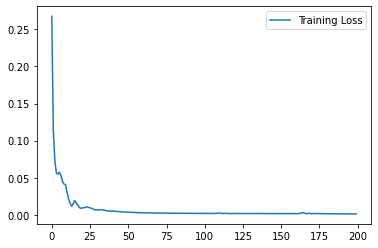

In [25]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [26]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.08 RMSE
Test Score: 0.06 RMSE


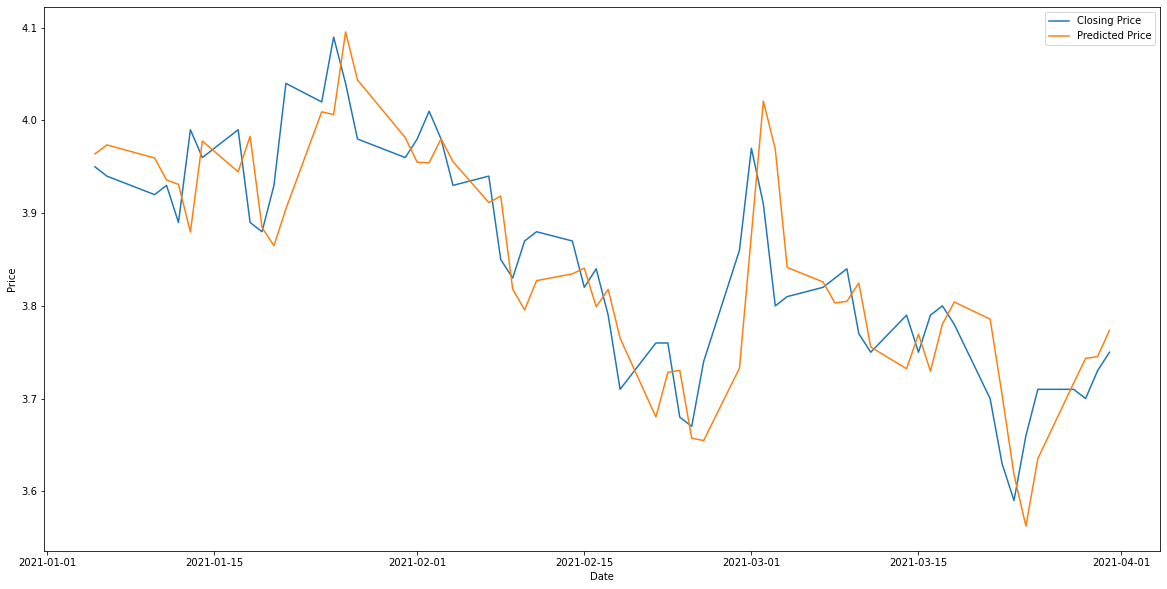

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
boll_daily = MNHD[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 9)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 9)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_22532/1850674313.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_22532/1850674313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 9)
C:\Users\Chris\AppData\Local\Temp/ipykernel_22532/1850674313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,4.810000,NaN,NaN,NaN
1,2020-01-05,4.410000,NaN,NaN,NaN
2,2020-01-06,4.280000,NaN,NaN,NaN
3,2020-01-08,4.410000,NaN,NaN,NaN
4,2020-01-09,4.620000,NaN,NaN,NaN
...,...,...,...,...,...
300,2021-03-25,3.635268,3.709901,3.882070,3.537731
301,2021-03-28,3.716757,3.704043,3.870587,3.537499
302,2021-03-29,3.743402,3.705593,3.873456,3.537731
303,2021-03-30,3.745239,3.701708,3.863301,3.540115


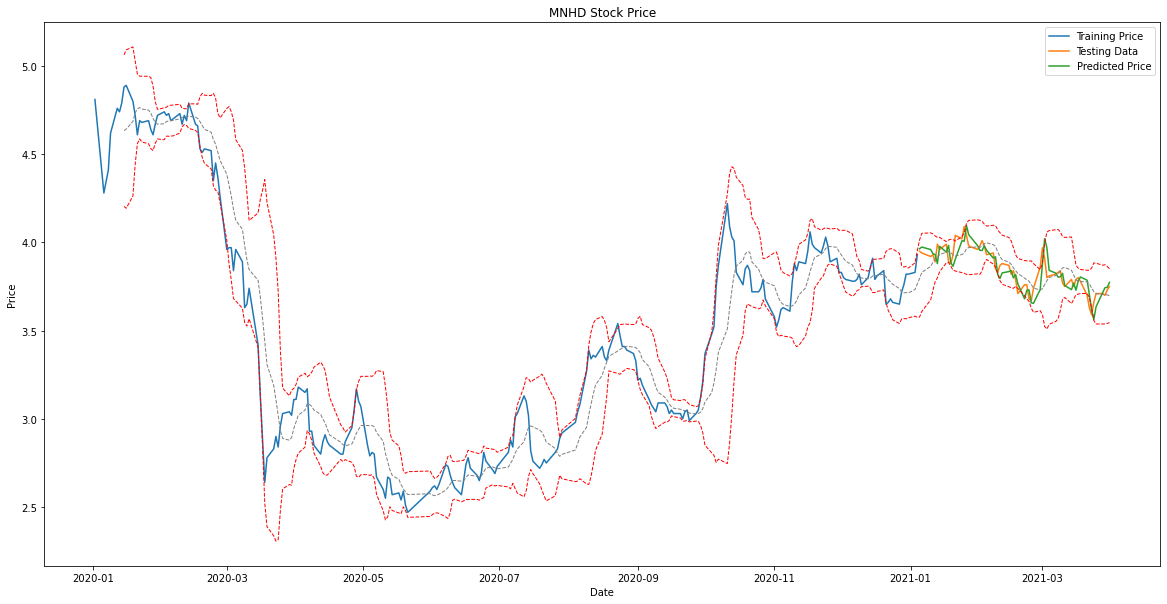

In [30]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MNHD Stock Price')
plt.legend()
plt.show()

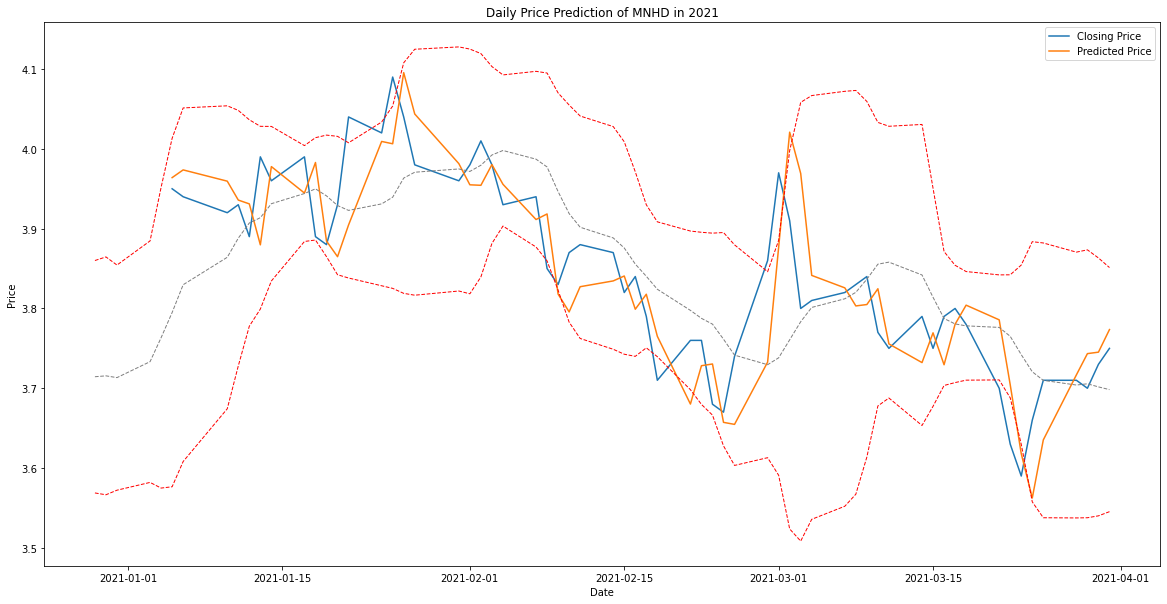

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][240:], boll_daily['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of MNHD in 2021')
plt.legend()
plt.show()

## Weekly

In [33]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [34]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(MNHD, testing_data, scaler, 15)

In [35]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [36]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.26999157667160034
Epoch  1 MSE:  0.16020217537879944
Epoch  2 MSE:  0.06325379014015198
Epoch  3 MSE:  0.1402711421251297
Epoch  4 MSE:  0.05580383539199829
Epoch  5 MSE:  0.08551407605409622
Epoch  6 MSE:  0.09639977663755417
Epoch  7 MSE:  0.08911041915416718
Epoch  8 MSE:  0.07327844202518463
Epoch  9 MSE:  0.05726224184036255
Epoch  10 MSE:  0.04957462474703789
Epoch  11 MSE:  0.054935432970523834
Epoch  12 MSE:  0.06204050034284592
Epoch  13 MSE:  0.05656098574399948
Epoch  14 MSE:  0.046128783375024796
Epoch  15 MSE:  0.04032246395945549
Epoch  16 MSE:  0.03940155357122421
Epoch  17 MSE:  0.03920453041791916
Epoch  18 MSE:  0.035053715109825134
Epoch  19 MSE:  0.023548852652311325
Epoch  20 MSE:  0.019227320328354836
Epoch  21 MSE:  0.02762475050985813
Epoch  22 MSE:  0.0178694948554039
Epoch  23 MSE:  0.018105026334524155
Epoch  24 MSE:  0.022835450246930122
Epoch  25 MSE:  0.02072594128549099
Epoch  26 MSE:  0.015580029226839542
Epoch  27 MSE:  0.01536680851131

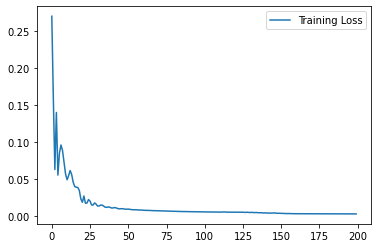

In [37]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [38]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.06 RMSE
Test Score: 3.32 RMSE


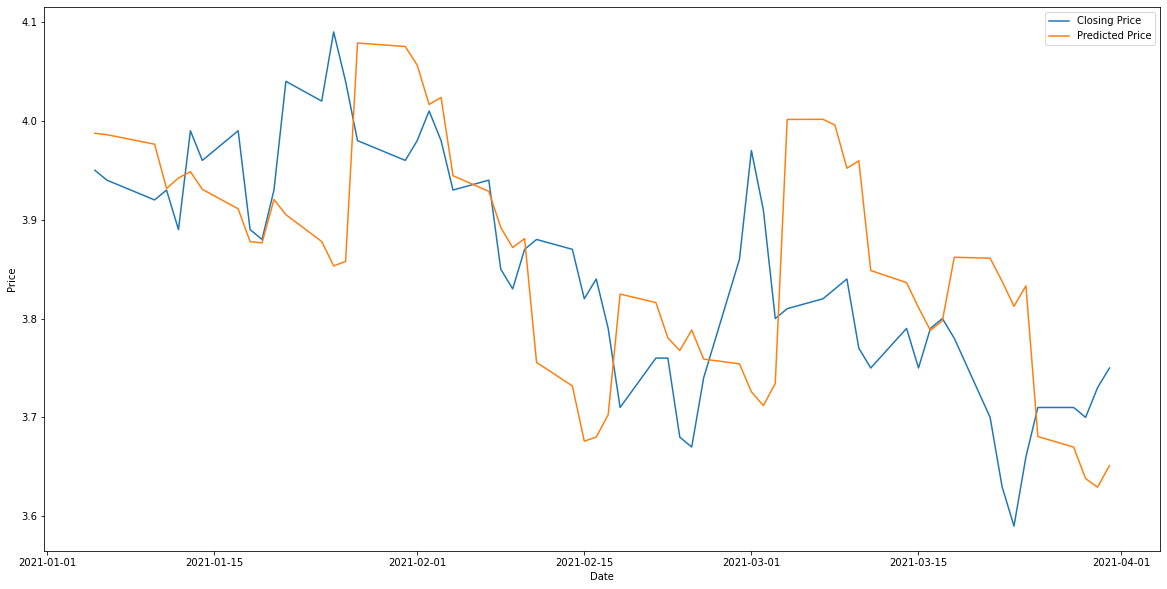

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
boll_weekly = MNHD[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 10)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_22532/1883886839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_22532/1883886839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_22532/1883886839.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,4.810000,NaN,NaN,NaN
1,2020-01-05,4.410000,NaN,NaN,NaN
2,2020-01-06,4.280000,NaN,NaN,NaN
3,2020-01-08,4.410000,NaN,NaN,NaN
4,2020-01-09,4.620000,NaN,NaN,NaN
...,...,...,...,...,...
300,2021-03-25,3.680630,3.812009,3.916664,3.707354
301,2021-03-28,3.669851,3.795361,3.931155,3.659568
302,2021-03-29,3.638012,3.778051,3.945387,3.610714
303,2021-03-30,3.629370,3.762186,3.953664,3.570708


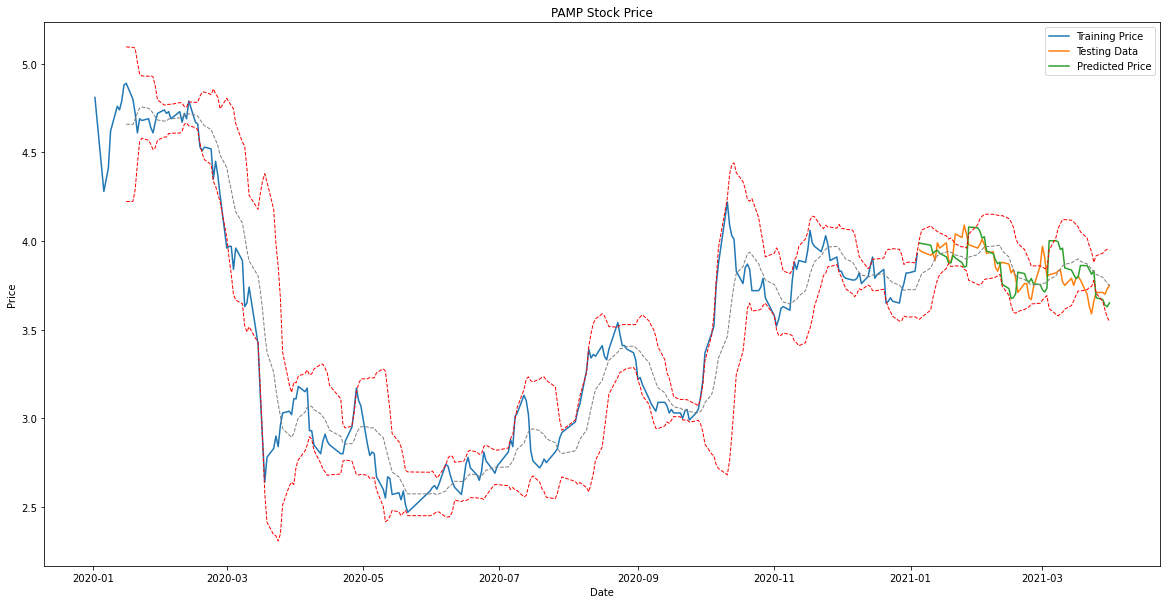

In [41]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

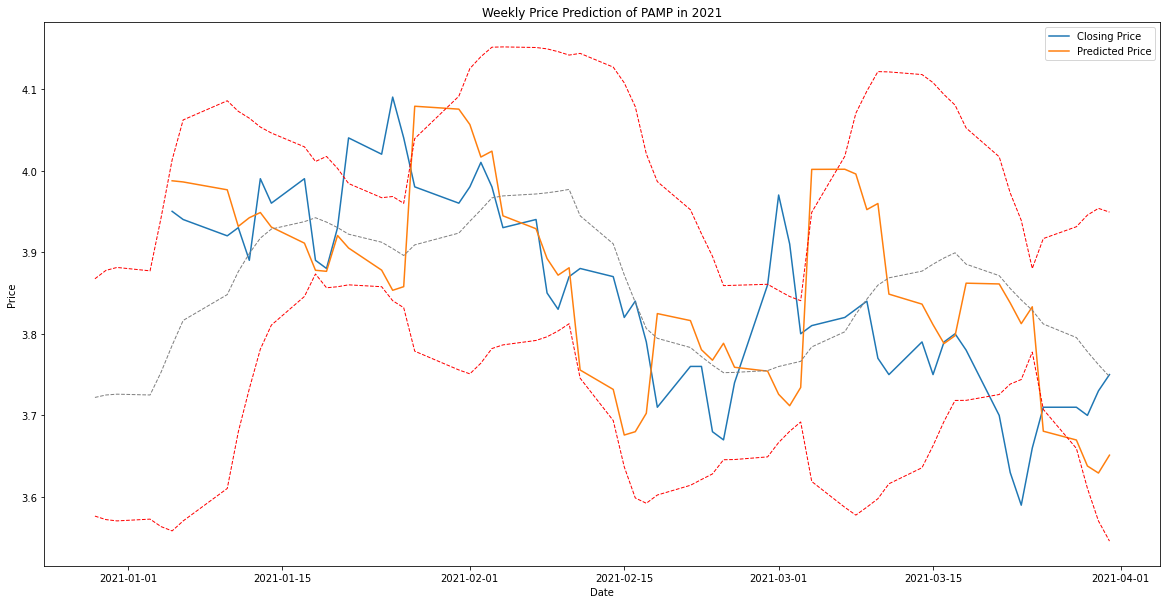

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][240:], boll_weekly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of PAMP in 2021')
plt.legend()
plt.show()

# Monthly

In [45]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [46]:
scaled_train_data_m = scaled_data[:250]

In [47]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data_m, 30)
X_test_m, y_test_m = get_monthly_test_data(MNHD, testing_data, scaler, 30)

In [48]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [49]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.18179583549499512
Epoch  1 MSE:  0.13866636157035828
Epoch  2 MSE:  0.08652835339307785
Epoch  3 MSE:  0.08662527054548264
Epoch  4 MSE:  0.04789932072162628
Epoch  5 MSE:  0.04770272970199585
Epoch  6 MSE:  0.05077667161822319
Epoch  7 MSE:  0.050418671220541
Epoch  8 MSE:  0.049334924668073654
Epoch  9 MSE:  0.04811207205057144
Epoch  10 MSE:  0.045854225754737854
Epoch  11 MSE:  0.04299977794289589
Epoch  12 MSE:  0.040512192994356155
Epoch  13 MSE:  0.03861970454454422
Epoch  14 MSE:  0.036842476576566696
Epoch  15 MSE:  0.034506235271692276
Epoch  16 MSE:  0.031221233308315277
Epoch  17 MSE:  0.02724115550518036
Epoch  18 MSE:  0.023733332753181458
Epoch  19 MSE:  0.024315450340509415
Epoch  20 MSE:  0.026767021045088768
Epoch  21 MSE:  0.023226298391819
Epoch  22 MSE:  0.020784802734851837
Epoch  23 MSE:  0.019980842247605324
Epoch  24 MSE:  0.019980642944574356
Epoch  25 MSE:  0.019747614860534668
Epoch  26 MSE:  0.01917959190905094
Epoch  27 MSE:  0.01849553175

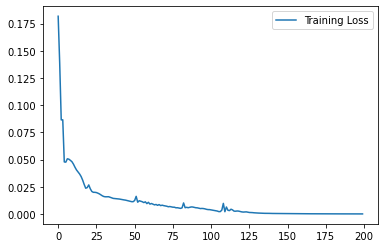

In [50]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [51]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.03 RMSE
Test Score: 3.40 RMSE


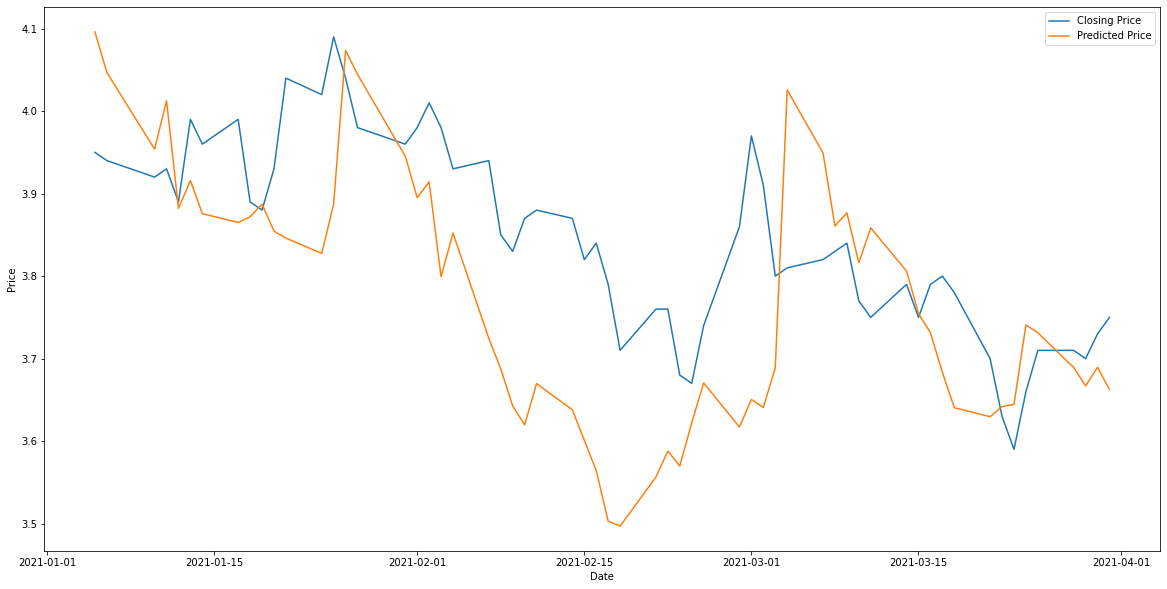

In [52]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
boll_monthly = MNHD[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 10)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_22532/4130989901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_22532/4130989901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_22532/4130989901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,4.810000,NaN,NaN,NaN
1,2020-01-05,4.410000,NaN,NaN,NaN
2,2020-01-06,4.280000,NaN,NaN,NaN
3,2020-01-08,4.410000,NaN,NaN,NaN
4,2020-01-09,4.620000,NaN,NaN,NaN
...,...,...,...,...,...
300,2021-03-25,3.731250,3.700414,3.821735,3.579093
301,2021-03-28,3.689246,3.688733,3.784687,3.592779
302,2021-03-29,3.666962,3.679953,3.764438,3.595468
303,2021-03-30,3.689422,3.675769,3.752772,3.598766


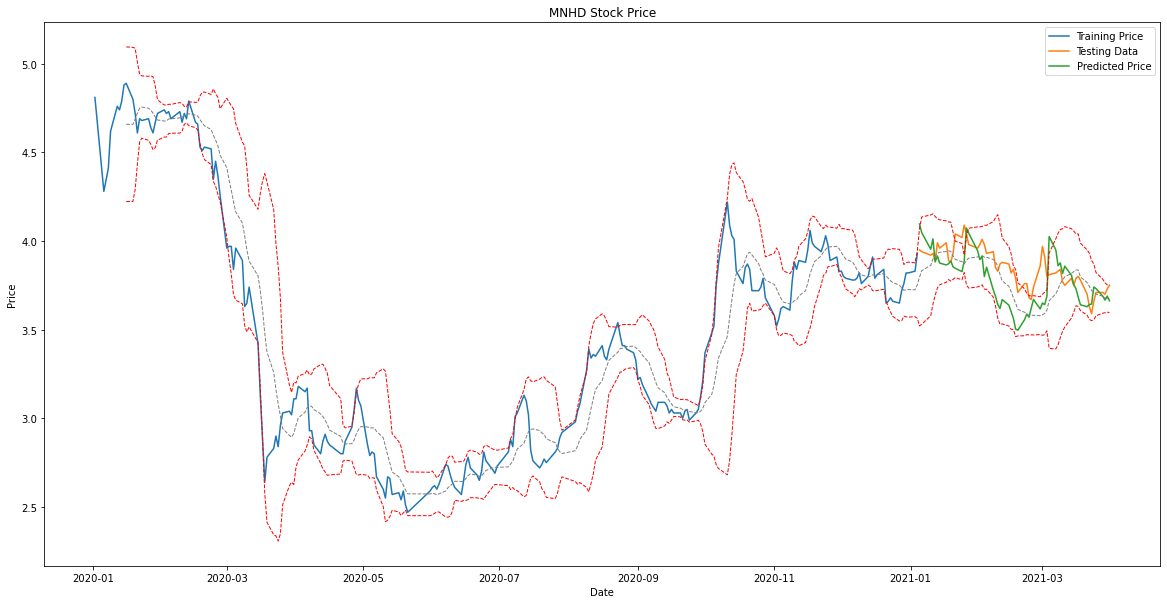

In [54]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MNHD Stock Price')
plt.legend()
plt.show()

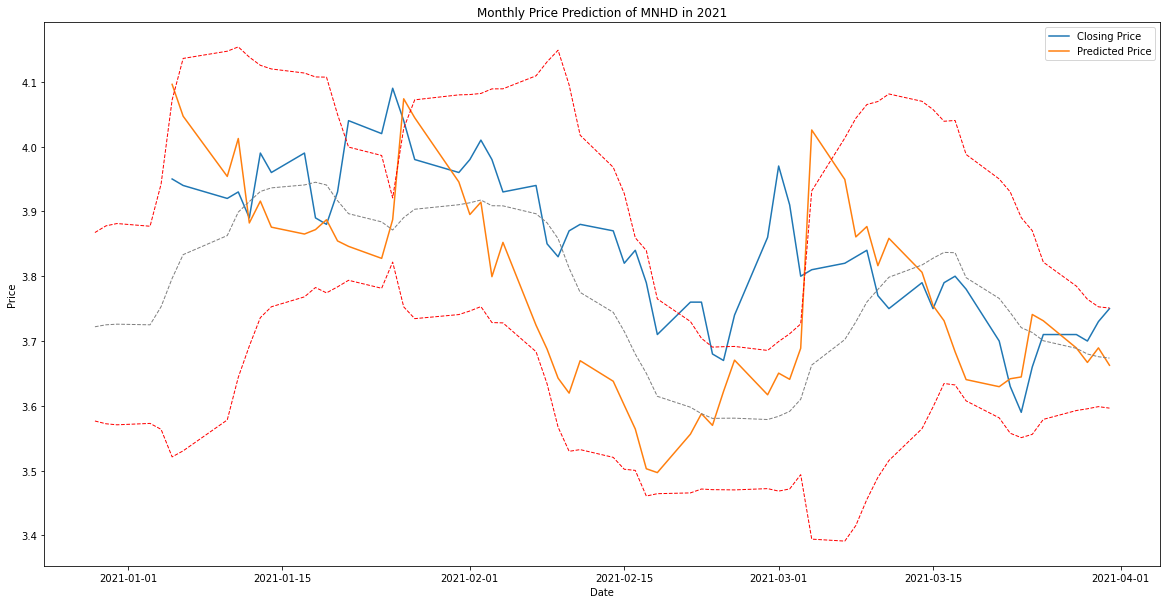

In [55]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][240:], boll_monthly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of MNHD in 2021')
plt.legend()
plt.show()